In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import sys
sys.path.append("C:\\Users\\Owen\\Documents\\git_projects\\CS534-Project-Team-2")
from src.data_pre_processing import load_data

In [10]:
model = tf.keras.models.load_model("C:\\Users\\Owen\\Documents\\git_projects\\CS534-Project-Team-2\\data\\dnet.keras")

[array([[-0.05859695, -0.03755986, -0.06366006, ..., -0.03643574,
          0.03096729, -0.06842068],
        [ 0.06344959, -0.07156231, -0.06441288, ..., -0.07081033,
         -0.04050028,  0.11028516],
        [-0.02350368, -0.02012919, -0.02745837, ..., -0.00048875,
          0.040422  , -0.01678934],
        ...,
        [-0.02018307,  0.05581069,  0.14789116, ...,  0.05730061,
          0.12978664,  0.01934402],
        [-0.18454826,  0.05722126, -0.03318503, ..., -0.02871867,
         -0.03425125,  0.1115735 ],
        [ 0.13757735, -0.04356066,  0.09100565, ...,  0.13872461,
          0.06283169, -0.12819712]], dtype=float32),
 array([ 0.00280727, -0.00503049,  0.03316713,  0.00769383,  0.01941936,
        -0.01031199,  0.07218955,  0.00664234,  0.01250808,  0.03129176,
        -0.05452448,  0.00888431, -0.02132989,  0.01073217, -0.03610117,
         0.01256972, -0.02188661, -0.04839011,  0.00266973, -0.00724114,
         0.07749156, -0.04705314, -0.05065732,  0.03335166, -0.008

In [4]:
data, labels = load_data()
formatted_labels = 1 - np.minimum(labels, 1)

In [5]:
predictions = model(data).numpy()

In [6]:
random_data = np.random.random((200, *data.shape[1:]))/100
random_predictions = model(random_data).numpy()

In [7]:
print("Random predictions", pd.DataFrame(random_predictions).describe())
print()
print("Whole Dataset predictions", pd.DataFrame(predictions).describe())
print()
print("Good Boid predictions", pd.DataFrame(predictions[formatted_labels[:, 0] == 1]).describe())
print()
print("Bad Boid predictions", pd.DataFrame(predictions[formatted_labels[:, 0] == 0]).describe())

Random predictions                 0
count  200.000000
mean     0.514049
std      0.036498
min      0.363418
25%      0.498484
50%      0.526335
75%      0.541549
max      0.553326

Whole Dataset predictions                    0
count  342360.000000
mean        0.664253
std         0.158543
min         0.000037
25%         0.573272
50%         0.693589
75%         0.783288
max         0.982491

Good Boid predictions                    0
count  285300.000000
mean        0.665781
std         0.154439
min         0.000318
25%         0.574887
50%         0.693680
75%         0.782513
max         0.982491

Bad Boid predictions                   0
count  57060.000000
mean       0.656612
std        0.177453
min        0.000037
25%        0.564156
50%        0.693025
75%        0.787434
max        0.980049


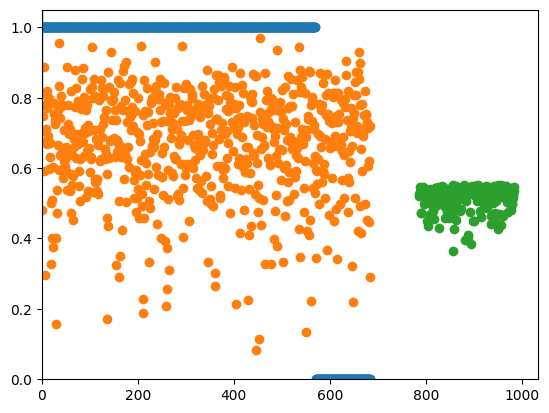

In [8]:
labels_pruned = formatted_labels[::500]
predictions_pruned = predictions[::500]
plt.scatter(range(len(labels_pruned)), labels_pruned)
plt.scatter(range(len(labels_pruned)), predictions_pruned)
plt.scatter(range(len(labels_pruned) + 100, len(labels_pruned) + random_predictions.shape[0] + 100), random_predictions)
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [9]:
loss = np.mean(np.square(predictions - formatted_labels))
loss

0.19006598